In [1]:
from glob import glob
import re
import numpy as np
from matplotlib import pyplot
import PIL
from scipy.misc import imresize
%matplotlib inline

In [2]:

class YaleFace(object):

    def __init__(self, shuffle=True, height=32, width=32):
        self.dataset_dir = '/data/leewk92/generative/yaleface/'
        self.pgm_list = glob(self.dataset_dir+'*/*.pgm')
        self.shuffle = shuffle
        self.height = height
        self.width = width
        self.offset = 0
        self.dataset = self.load_dataset()

    def load_dataset(self):
        images = []

        for pgm_filename in self.pgm_list:
            try:
                image = self.read_pgm(pgm_filename)
                image = self.normalize_image(image)
                images.append(image)
            except:
                print('file reading is failed', pgm_filename)

        images = np.array(images)
        self.total_num = len(images)
        if self.shuffle:
            perm = np.arange(self.total_num)
            np.random.shuffle(perm)
            images = images[perm]
        return images


    def normalize_image(self, image):
        image = imresize(image, (self.height, self.width))
        image = np.array(image, dtype=np.float32)
        image /=127.5
        image -= 1.0
        return image


    def read_pgm(self, filename, byteorder='>'):
        """Return image data from a raw PGM file as numpy array.

        Format specification: http://netpbm.sourceforge.net/doc/pgm.html

        """
        with open(filename, 'rb') as f:
            buffer = f.read()
        try:
            header, width, height, maxval = re.search(
                b"(^P5\s(?:\s*#.*[\r\n])*"
                b"(\d+)\s(?:\s*#.*[\r\n])*"
                b"(\d+)\s(?:\s*#.*[\r\n])*"
                b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
        except AttributeError:
            raise ValueError("Not a raw PGM file: '%s'" % filename)
        return np.frombuffer(buffer,
                                dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                                count=int(width)*int(height),
                                offset=len(header)
                                ).reshape((int(height), int(width)))


    def next_batch(self, batch_size):
        total_num = self.total_num
        if batch_size > total_num:
            print('error : batch_size > total_num')
            return
        offset = self.offset
        until = offset + batch_size
        if until >= total_num:
            until -= total_num
            batch = np.concatenate((self.dataset[offset:], self.dataset[:until]))
        else:
            batch = self.dataset[offset:until]
        self.offset = until
        return batch

In [3]:
yf = YaleFace()
d = yf.dataset

('file reading is failed', '/data/leewk92/generative/yaleface/yaleB07/yaleB07_P00A-010E-20.pgm')
('file reading is failed', '/data/leewk92/generative/yaleface/yaleB30/yaleB30_P00A-010E-20.pgm')
('file reading is failed', '/data/leewk92/generative/yaleface/yaleB31/yaleB31_P00A+110E+65.pgm')
('file reading is failed', '/data/leewk92/generative/yaleface/yaleB37/yaleB37_P00A-025E+00.pgm')
('file reading is failed', '/data/leewk92/generative/yaleface/yaleB10/yaleB10_P00A-025E+00.pgm')


In [4]:
d.shape

(2447, 32, 32)

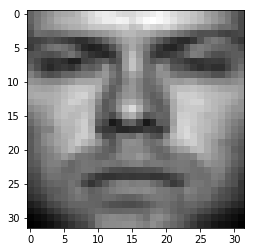

In [5]:
pyplot.imshow(d[1], pyplot.cm.gray)
pyplot.show()

In [6]:
yf.next_batch(10)

array([[[-0.51372552, -0.50588238, -0.47450978, ..., -0.98431373,
         -0.99215686, -1.        ],
        [-0.46666664, -0.4588235 , -0.4588235 , ..., -0.96862745,
         -0.98431373, -0.99215686],
        [-0.45098037, -0.43529409, -0.46666664, ..., -0.94509804,
         -0.96078432, -0.97647059],
        ..., 
        [-0.25490195, -0.16862744, -0.12156862, ..., -0.96862745,
         -1.        , -0.99215686],
        [-0.35686272, -0.27843136, -0.20784312, ..., -0.96862745,
         -1.        , -1.        ],
        [-0.45098037, -0.38823527, -0.30196077, ..., -0.96862745,
         -1.        , -1.        ]],

       [[-0.23137254, -0.11372548,  0.00392163, ..., -0.09803921,
         -0.26274508, -0.40392154],
        [-0.23921567, -0.09019607,  0.03529418, ..., -0.08235294,
         -0.27843136, -0.41176468],
        [-0.28627449, -0.0745098 ,  0.05098045, ..., -0.15294117,
         -0.23921567, -0.41176468],
        ..., 
        [-0.81176472, -0.75686276, -0.7019608 , ...,